# Projet data mining  
#### Sujet : Triage des patients aux urgences
###### BUT SD 23-24

Algassimou DIALLO

### Packages

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.style.use('ggplot')

### Transformation données R.data en dataframe pandas

Pyreader met beaucoup trop de temps à transformer les données 
Du coup on sauvegarde les données en csv après les avoir transfomées en dataframe puis on les recharge avec pd_read_csv.

In [123]:
#import pyreadr

In [124]:
#result = pyreadr.read_r('5v_cleandf.rdata')

#data = result["df"] 

In [125]:
#data.to_csv("data.csv")

## Data prep

In [126]:
data = pd.read_csv("data.csv", index_col=0)

In [127]:
data.head(10)

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,A,3.0,86.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,A,4.0,87.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,B,2.0,75.0,Male,Non-Hispanic,White or Caucasian,English,None,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,B,2.0,75.0,Male,Non-Hispanic,White or Caucasian,English,None,Married,Retired,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
data.tail(10)

,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
560476,B,4.0,21.0,Male,Hispanic or Latino,Other,Other,None,Single,Not Employed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560477,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560478,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560479,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560480,A,3.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560481,A,2.0,49.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560482,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560483,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560484,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
560485,A,3.0,50.0,Male,Non-Hispanic,White or Caucasian,English,Episcopal,Single,Disabled,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
data.describe()

,esi,age,2ndarymalig,abdomhernia,abdomnlpain,abortcompl,acqfootdef,acrenlfail,acutecvd,acutemi,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
count,558029.000000,560475.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,560486.000000,...,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000,557901.000000
mean,3.012385,49.876765,0.002155,0.030634,0.014807,0.000023,0.005179,0.009968,0.051054,0.035844,...,0.001298,0.000717,0.013085,0.001052,0.001165,0.004219,0.002863,0.001233,0.001393,0.002518
std,0.869106,20.417029,0.046375,0.172324,0.120779,0.004816,0.071782,0.099342,0.220108,0.185901,...,0.036001,0.026900,0.113638,0.032475,0.034113,0.064820,0.053426,0.035095,0.037293,0.050156
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,108.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


## Exploratory Data Analysis 

- Variable cible "disposition"

On constate que 70% des visites des patients à l'ER ont fini par un discharge et seul 30% des visites ont fini par une admission.

In [130]:
data.groupby("disposition")["disposition"].count()/len(data["disposition"])

disposition
Admit        0.29731
Discharge    0.70269
Name: disposition, dtype: float64

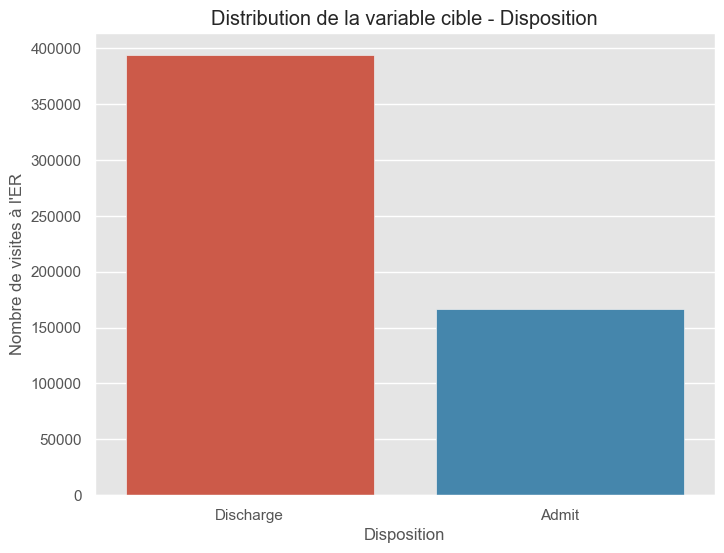

In [131]:
plt.figure(figsize=(8, 6))
sns.countplot(x='disposition', data=data)
plt.title('Distribution de la variable cible - Disposition')
plt.xlabel('Disposition')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()

Pour simplifier l'EDA nous allons diviser le dataset selon les catégories des variables dans la doc.
Nous rajoutons la variable cible "disposition" dans chaque catégorie pour l'étude.

![My Image](categories.png)

On choisit pour le moment d'étudier **le triage des patients**.
On commence par les deux catégories qui semblent les plus intéressantes pour l'EDA: **Demographics et Triage evalution** avant de s'attaquer au **Chief complaint**(*on rajoute la variable ESI pour cette catégorie*).

In [192]:
demo = data[["disposition","age","gender","ethnicity","race","lang","religion","maritalstatus","employstatus","insurance_status"]]
trieval = data[["disposition","dep_name","arrivalmode","arrivalmonth","arrivalday","arrivalhour_bin","triage_vital_hr","triage_vital_sbp","triage_vital_dbp","triage_vital_rr","triage_vital_o2","triage_vital_o2_device","triage_vital_temp","esi","age",]]
chief_comp= data[["esi", "disposition","cc_abdominaldistention","cc_abdominalpain","cc_abdominalpainpregnant","cc_abnormallab","cc_abscess","cc_addictionproblem","cc_agitation","cc_alcoholintoxication","cc_alcoholproblem","cc_allergicreaction","cc_alteredmentalstatus","cc_animalbite","cc_ankleinjury","cc_anklepain","cc_anxiety","cc_arminjury","cc_armpain","cc_armswelling","cc_assaultvictim"]]

### Demographics

In [193]:
demo.head()

,disposition,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status
0,Discharge,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other
1,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
2,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
3,Discharge,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial
4,Admit,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare


In [165]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   disposition       560486 non-null  object 
 1   age               560475 non-null  float64
 2   gender            560486 non-null  object 
 3   ethnicity         560486 non-null  object 
 4   race              560460 non-null  object 
 5   lang              560486 non-null  object 
 6   religion          560486 non-null  object 
 7   maritalstatus     560486 non-null  object 
 8   employstatus      560486 non-null  object 
 9   insurance_status  560486 non-null  object 
dtypes: float64(1), object(9)
memory usage: 47.0+ MB


Nous remarquons quelques valeurs manquantes pour l'âge et la race.
- l'âge est une variable très importante et sensible(voir graphiqe ci-dessous)donc on ne peut pas simplement les remplacer par une moyenne ou une mediane.
- la race est une variable qui n'influence pas trop(voir graphique ci-dessous) on peut donc les remplacer par une valeur ou tout simplement supprimer ces lignes. 

Pour le moment on décide de ne rien faire, on décidera de la méthode à adopter lors du choix des modèles.

In [166]:
demo.isna().sum()

disposition          0
age                 11
gender               0
ethnicity            0
race                26
lang                 0
religion             0
maritalstatus        0
employstatus         0
insurance_status     0
dtype: int64

In [154]:
demo.ethnicity.unique()

array(['Hispanic or Latino', 'Non-Hispanic', 'Patient Refused', 'Unknown'],
      dtype=object)

In [137]:
demo.race.unique()

array(['White or Caucasian', 'Native Hawaiian or Other Pacific Islander',
       'Other', 'Black or African American', 'Patient Refused', 'Asian',
       'Unknown', 'American Indian or Alaska Native', nan], dtype=object)

#### Distribution de l'âge

On remarque une nette différence dans la distrution de l'admission des patients en ER selon l'âge.
- Les "jeunes"(18-35 ans) sont majoritairement en "discharge".
- Ceux qui sont le plus admis sont les personnes agées de 50 - 60 ans.

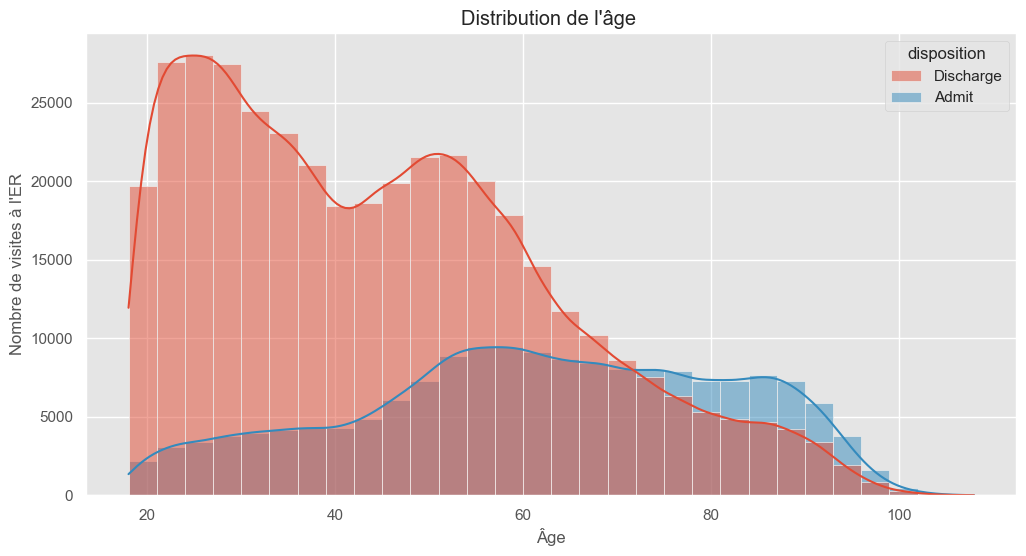

In [140]:
plt.figure(figsize=(12, 6))
sns.histplot(x='age', hue='disposition', data=demo, kde=True, bins=30)
plt.title('Distribution de l\'âge ')
plt.xlabel('Âge')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()


En utlisant un boxplot on voit encore mieux la différence entre la répartition de l'age.
Les personnes agées sont nettements plus "admis" que les jeunes"

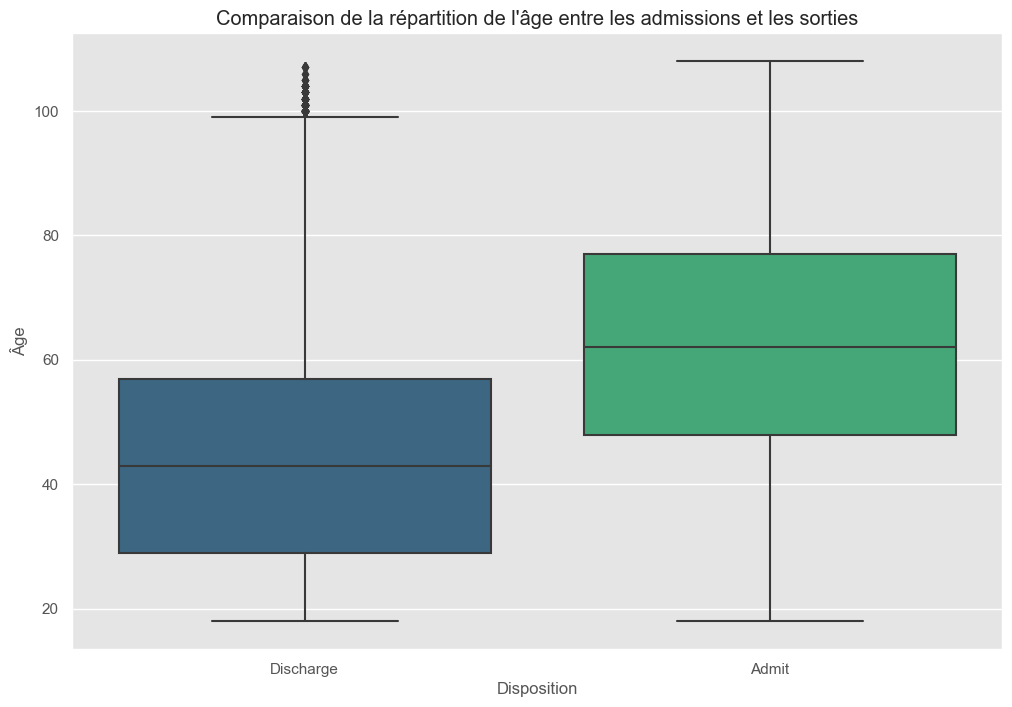

In [174]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='disposition', y='age', data=demo, palette='viridis')
plt.title('Comparaison de la répartition de l\'âge entre les admissions et les sorties')
plt.xlabel('Disposition')
plt.ylabel('Âge')
plt.show()

In [195]:
from scipy.stats import ttest_ind

# Sélection des âges pour les admissions et les sorties
admissions_age = demo.loc[demo['disposition'] == "Discharge", 'age']
discharges_age = demo.loc[demo['disposition'] == "Admit", 'age']
sorties_age




Series([], Name: age, dtype: float64)

In [196]:
from scipy.stats import ttest_ind

# Convert 'disposition' to numeric values (if it contains strings)
demo['disposition'] = demo['disposition'].map({'Admit': 1, 'Discharge': 0})

# Using .loc to select ages for admissions and discharges
admissions_age = demo.loc[demo['disposition'] == 1, 'age']
discharges_age = demo.loc[demo['disposition'] == 0, 'age']

# Print the number of observations in each group
print(f"Number of admissions: {len(admissions_age)}")
print(f"Number of discharges: {len(discharges_age)}")

# Performing the t-test if both groups have observations
if len(admissions_age) > 0 and len(discharges_age) > 0:
    t_stat, p_value = ttest_ind(admissions_age, discharges_age, equal_var=False)
    print(f"Results of the t-test for age between admissions and discharges:\nT-statistic = {t_stat}, p-value = {p_value}")
else:
    print("Insufficient data to perform the t-test.")

Number of admissions: 166638
Number of discharges: 393848
Results of the t-test for age between admissions and discharges:
T-statistic = nan, p-value = nan


/var/folders/w4/j3612znd705bchzr9k5ywrlm0000gn/T/ipykernel_14823/4139074202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo['disposition'] = demo['disposition'].map({'Admit': 1, 'Discharge': 0})


In [45]:
age_stats = demo.groupby('disposition')['age'].agg(['mean', 'std'])
print("Moyenne et écart-type de l'âge en fonction de la disposition :\n", age_stats)


Moyenne et écart-type de l'âge en fonction de la disposition :
                   mean        std
disposition                      
Admit        61.590443  19.699300
Discharge    44.920627  18.612371


#### Distribution du genre 

On ne remarque pas grand choses au niveau du genre . Les distributions sont très similaires.

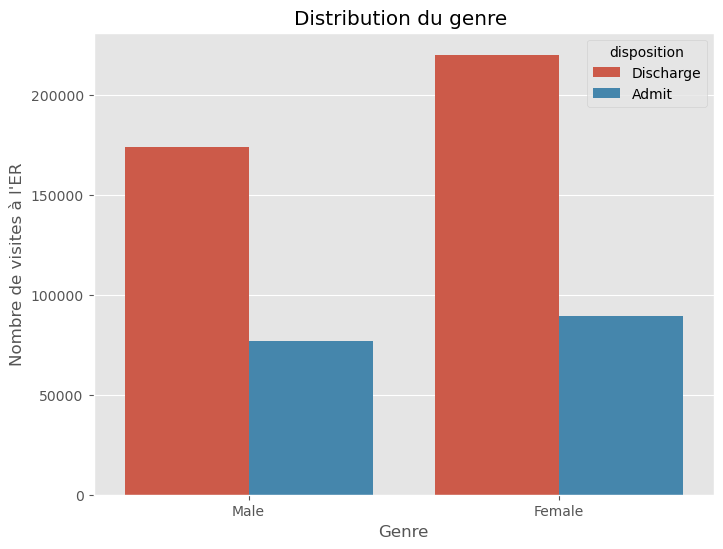

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='disposition', data=demo)
plt.title('Distribution du genre ')
plt.xlabel('Genre')
plt.ylabel('Nombre de visites à l\'ER')
plt.show()


#### Distribution de la race en fonction de la disposition

Pareil pour la race, malgré la grande différence du nombre de patients par race, les distributions sont un peu semblables. "White caucasian" reste tout de même la race la plus admise : plus de 50% sur le total. Tandis que les autres races sont dans les alentours de 30% d'admis.


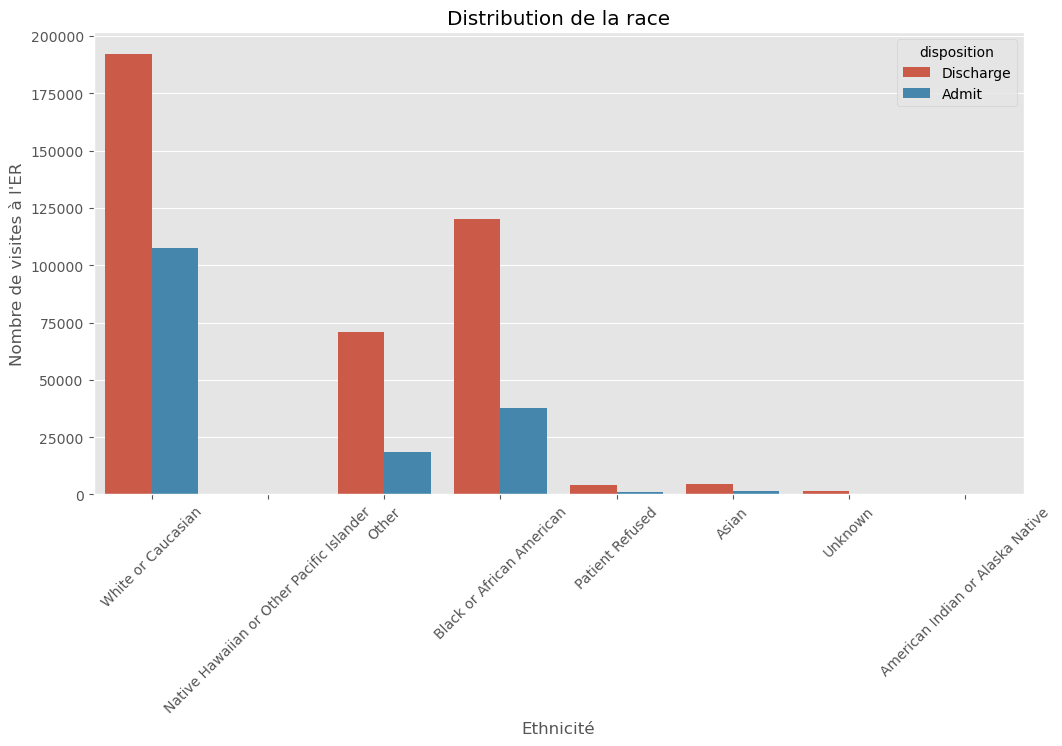

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='race', hue='disposition', data=demo)
plt.title('Distribution de la race')
plt.xlabel('Ethnicité')
plt.ylabel('Nombre de visites à l\'ER')
plt.xticks(rotation=45)
plt.show()

### Triage Evaluation

Maintenant interessons aux variables utilisés par les infirmiers pour effectuer le triage en particulcier le ESI attribuer aux patients

In [21]:
trieval.head()

,disposition,dep_name,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,esi
0,Discharge,B,Walk-in,June,Tuesday,23-02,63.0,146.0,85.0,18.0,97.0,0.0,97.0,4.0
1,Discharge,B,Car,January,Tuesday,15-18,83.0,125.0,77.0,16.0,NaN,0.0,98.0,4.0
2,Discharge,B,Walk-in,July,Thursday,11-14,78.0,134.0,78.0,16.0,97.0,NaN,97.8,2.0
3,Discharge,A,Car,July,Saturday,11-14,98.0,171.0,92.0,18.0,98.0,0.0,NaN,2.0
4,Admit,A,Walk-in,November,Tuesday,07-10,101.0,133.0,72.0,18.0,97.0,0.0,98.4,3.0


In [22]:
trieval.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   disposition             560486 non-null  object 
 1   dep_name                560486 non-null  object 
 2   arrivalmode             538602 non-null  object 
 3   arrivalmonth            560486 non-null  object 
 4   arrivalday              560486 non-null  object 
 5   arrivalhour_bin         560486 non-null  object 
 6   triage_vital_hr         394434 non-null  float64
 7   triage_vital_sbp        392582 non-null  float64
 8   triage_vital_dbp        392423 non-null  float64
 9   triage_vital_rr         389999 non-null  float64
 10  triage_vital_o2         289169 non-null  float64
 11  triage_vital_o2_device  333631 non-null  float64
 12  triage_vital_temp       377501 non-null  float64
 13  esi                     558029 non-null  float64
dtypes: float64(8), objec

Nous avons énormément de valeurs manquantes pour près de 70% des variables de cette catégorie.

Ces variables(*particulièrement les signes vitaux*) influencent beaucoup la valeur du ESI(*valeur qui influence aussi beaucoup la variable cible*) attribuée par l'infirmier aux patients. On ne peut donc pas supprimer ces valeurs ni les remplacer bêtement. Pareil que pour l'âge on décidera de la méthode à adopter lors du choix des modèles.

In [23]:
trieval.isna().sum()

disposition                    0
dep_name                       0
arrivalmode                21884
arrivalmonth                   0
arrivalday                     0
arrivalhour_bin                0
triage_vital_hr           166052
triage_vital_sbp          167904
triage_vital_dbp          168063
triage_vital_rr           170487
triage_vital_o2           271317
triage_vital_o2_device    226855
triage_vital_temp         182985
esi                         2457
dtype: int64

In [24]:
trieval.describe()

,triage_vital_hr,triage_vital_sbp,triage_vital_dbp,triage_vital_rr,triage_vital_o2,triage_vital_o2_device,triage_vital_temp,esi
count,394434.000000,392582.000000,392423.000000,389999.000000,289169.000000,333631.000000,377501.000000,558029.000000
mean,85.593333,133.365059,80.486044,17.617040,97.266667,0.040599,98.084147,3.012385
std,16.717428,21.318966,13.867425,1.955679,1.933673,0.197359,0.783628,0.869106
min,30.000000,45.000000,25.000000,8.000000,60.000000,0.000000,90.000000,1.000000
25%,74.000000,119.000000,71.000000,16.000000,96.000000,0.000000,97.700000,2.000000
50%,84.000000,131.000000,80.000000,18.000000,98.000000,0.000000,98.000000,3.000000
75%,96.000000,145.000000,89.000000,18.000000,99.000000,0.000000,98.400000,4.000000
max,280.000000,312.000000,214.000000,69.000000,99.000000,1.000000,106.000000,5.000000


#### Distribution de l'ESI en fonction de la disposition

On constate que le nombre d'admis est supérieur au nombre de "discharge" pour les ESI = 1 & ESI = 2. A partir de ESI = 3 la majorité des patients sont en "discharge".

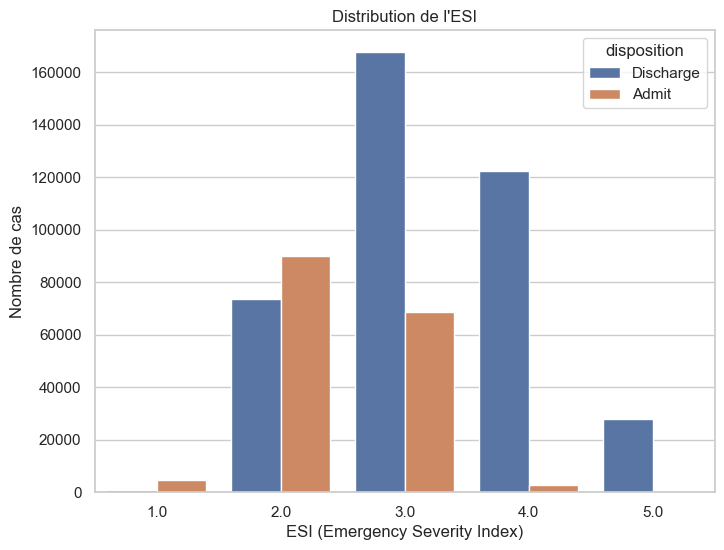

In [98]:
plt.figure(figsize=(8, 6))
sns.countplot(x='esi', hue='disposition', data=trieval)
plt.title('Distribution de l\'ESI')
plt.xlabel('ESI (Emergency Severity Index)')
plt.ylabel('Nombre de cas')
plt.show()

On décide de rajouter la variable age pour comparer le ESI à l'age.
On constate la même chose que sur l'age et la disposition, les jeunes ont en moyenne un ESI de 3 ou + tandis que les personnes plus agées ont en moyenne un ESI de 2.
Plus la personne est agée et plus l'ESI est petit donc important.

/var/folders/w4/j3612znd705bchzr9k5ywrlm0000gn/T/ipykernel_14823/494492786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trieval['age_group'] = pd.cut(trieval['age'], bins=range(18, 100, 10), labels=[f'{i}-{i+12}' for i in range(18, 90, 10)], right=False)


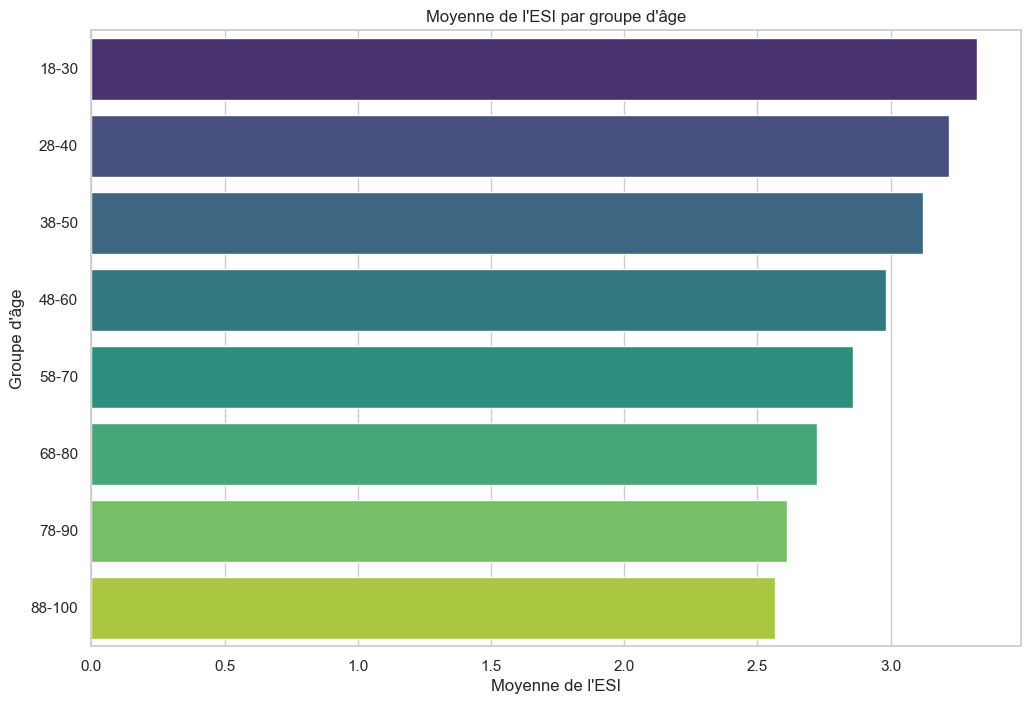

In [117]:
trieval['age_group'] = pd.cut(trieval['age'], bins=range(18, 100, 10), labels=[f'{i}-{i+12}' for i in range(18, 90, 10)], right=False)

# Comparaison de l'ESI en fonction des groupes d'âge
esi_mean_by_age = trieval.groupby('age_group')['esi'].mean().reset_index()

# Barplot de la moyenne de l'ESI par groupe d'âge
plt.figure(figsize=(12, 8))
sns.barplot(x='esi', y='age_group', data=esi_mean_by_age, palette='viridis')
plt.title('Moyenne de l\'ESI par groupe d\'âge')
plt.ylabel('Groupe d\'âge')
plt.xlabel('Moyenne de l\'ESI')
plt.show()


#### Distribution de l'ESI en fonction du service d'urgence
On ne constate rien de très important à part que le service B recoit le plus patients sinon les distributions sont à peu près semblables.

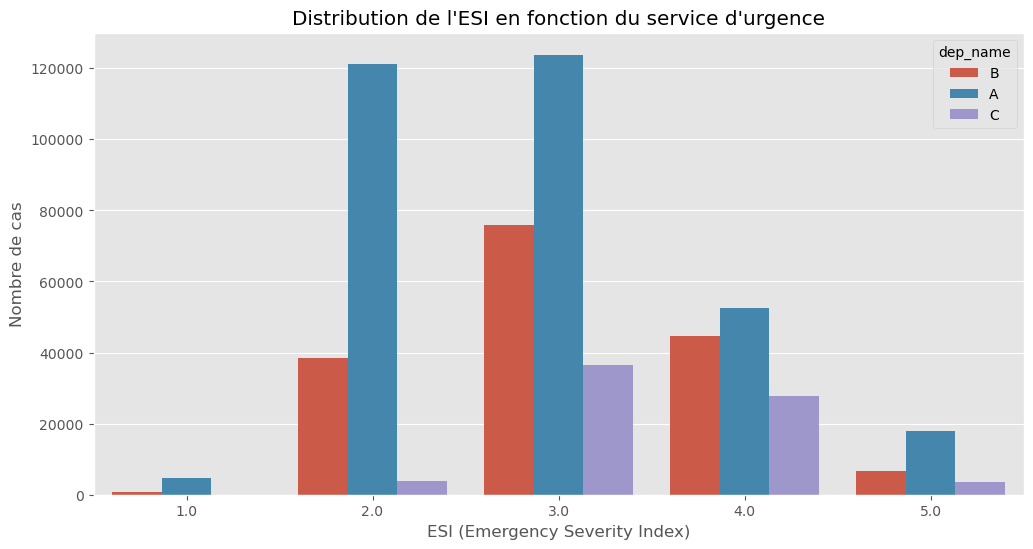

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='esi', hue='dep_name', data=trieval)
plt.title('Distribution de l\'ESI en fonction du service d\'urgence')
plt.xlabel('ESI (Emergency Severity Index)')
plt.ylabel('Nombre de cas')
plt.show()

#### Distribution de la disposition en fonction du moyen d'arriver à l'ER

On remarque que les patients "admis" arrivent le plus souvent en ambulance et en voiture.

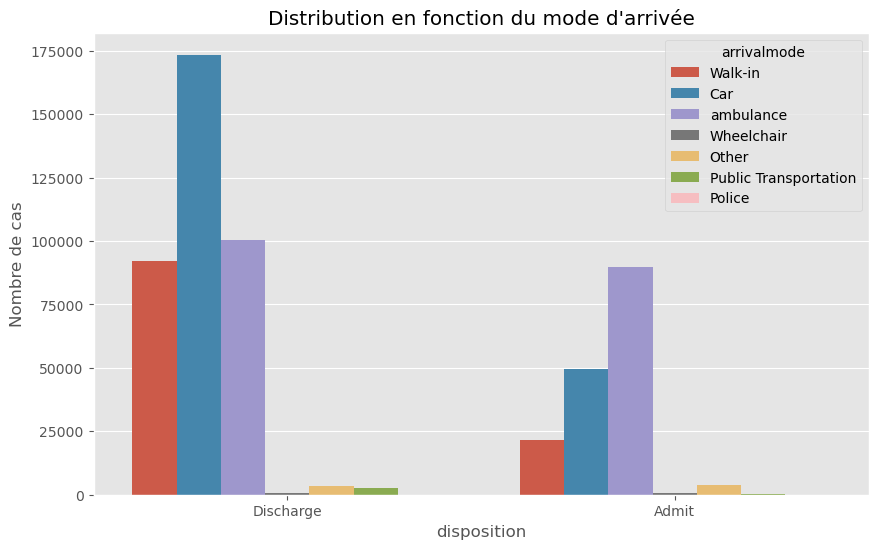

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='disposition', hue='arrivalmode', data=trieval)
plt.title('Distribution en fonction du mode d\'arrivée')
plt.ylabel('Nombre de cas')
plt.show()

#### Distribution des signes vitaux en fonction de l'ESI

On remarque une nette différence pour tous les signes vitaux en fonction de l'ESI.
Une valeur elevée des signes vitaux correpond à une valeur importante de ESI (1 & 2) et les faibles valeurs correspond aux ESI (4 & 5), et les valeurs plus ou moins normales des signes vitaux correspond à un ESI de 3.

Le triage avec l'ESI est donc une valeur très importante qui résume les informations de la situation du patient.

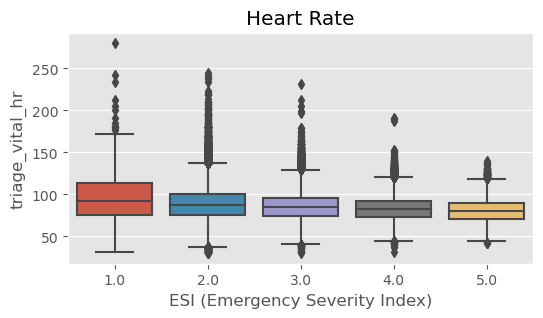

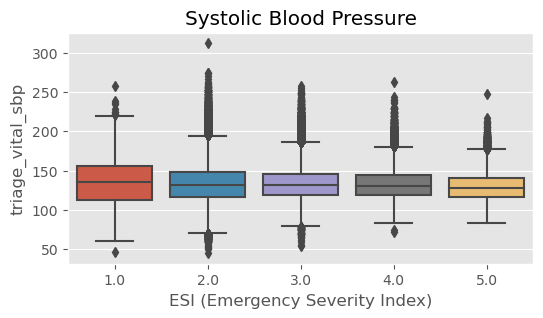

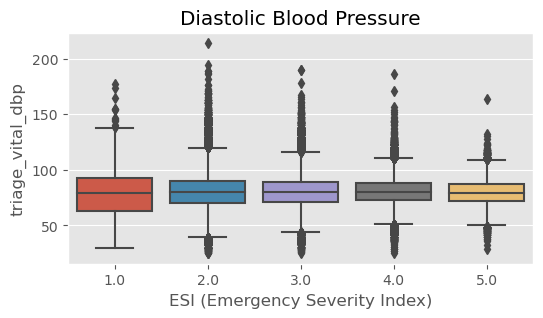

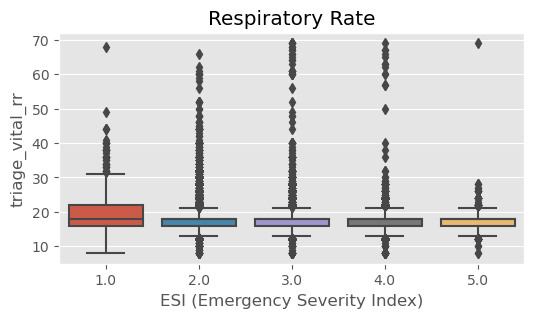

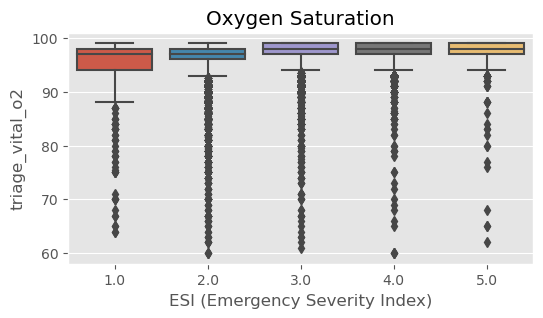

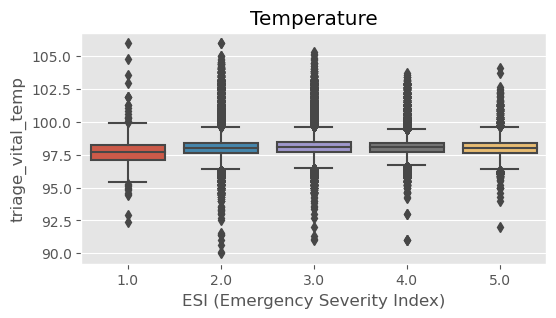

In [29]:
signes_vitaux = {
    'triage_vital_hr': 'Heart Rate',
    'triage_vital_sbp': 'Systolic Blood Pressure',
    'triage_vital_dbp': 'Diastolic Blood Pressure',
    'triage_vital_rr': 'Respiratory Rate',
    'triage_vital_o2': 'Oxygen Saturation',
    'triage_vital_temp': 'Temperature'
}


for var, description in signes_vitaux.items():
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='esi', y=var, data=trieval)
    plt.title(description)
    plt.xlabel('ESI (Emergency Severity Index)')
    plt.ylabel(var)
    plt.show()

### Chief Complaint

In [30]:
chief_comp.head()

,esi,disposition,cc_abdominaldistention,cc_abdominalpain,cc_abdominalpainpregnant,cc_abnormallab,cc_abscess,cc_addictionproblem,cc_agitation,cc_alcoholintoxication,...,cc_allergicreaction,cc_alteredmentalstatus,cc_animalbite,cc_ankleinjury,cc_anklepain,cc_anxiety,cc_arminjury,cc_armpain,cc_armswelling,cc_assaultvictim
0,4.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,Discharge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,Admit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
chief_comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 560486 entries, 0 to 560485
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   esi                       558029 non-null  float64
 1   disposition               560486 non-null  object 
 2   cc_abdominaldistention    557901 non-null  float64
 3   cc_abdominalpain          557901 non-null  float64
 4   cc_abdominalpainpregnant  557901 non-null  float64
 5   cc_abnormallab            557901 non-null  float64
 6   cc_abscess                557901 non-null  float64
 7   cc_addictionproblem       557901 non-null  float64
 8   cc_agitation              557901 non-null  float64
 9   cc_alcoholintoxication    557901 non-null  float64
 10  cc_alcoholproblem         557901 non-null  float64
 11  cc_allergicreaction       557901 non-null  float64
 12  cc_alteredmentalstatus    557901 non-null  float64
 13  cc_animalbite             557901 non-null  f

Pareil ici aussi, nous avons beaucoup de valeurs manquantes, nous déciderons de la méthode à suivre lors du choix des modèles.

In [89]:
chief_comp.isna().sum()

esi                         2457
disposition                    0
cc_abdominaldistention      2585
cc_abdominalpain            2585
cc_abdominalpainpregnant    2585
cc_abnormallab              2585
cc_abscess                  2585
cc_addictionproblem         2585
cc_agitation                2585
cc_alcoholintoxication      2585
cc_alcoholproblem           2585
cc_allergicreaction         2585
cc_alteredmentalstatus      2585
cc_animalbite               2585
cc_ankleinjury              2585
cc_anklepain                2585
cc_anxiety                  2585
cc_arminjury                2585
cc_armpain                  2585
cc_armswelling              2585
cc_assaultvictim            2585
dtype: int64

On a beaucoup trop de symptomes, on ne peut tous les visualiser et les comparer en même temps, on décide donc de séparer les symptomes en sous groupe selon le type de symptomes

In [93]:
symptoms_douleur = ['cc_abdominalpain','cc_armswelling', 'cc_abdominaldistention','cc_abdominalpainpregnant','cc_anklepain', 'cc_arminjury', 'cc_armpain']
symptoms_comportement = ['cc_alteredmentalstatus', 'cc_anxiety','cc_abnormallab','cc_addictionproblem','cc_allergicreaction','cc_agitation', 'cc_alcoholintoxication','cc_alcoholproblem']
symptoms_blessures = ['cc_ankleinjury', 'cc_animalbite', 'cc_assaultvictim']


chief_comp_douleur = chief_comp[['disposition'] + symptoms_douleur]
chief_comp_comportement = chief_comp[['disposition'] + symptoms_comportement]
chief_comp_blessures = chief_comp[['disposition'] + symptoms_blessures]



#### Distribution des symptomes

On constate que les symptomes n'influence presque pas l'admission, seul quelques symptomes("abdominal pain", "altered mental status" et "alcohol intoxication") ont fini par une admission, le reste tous en "discharge"

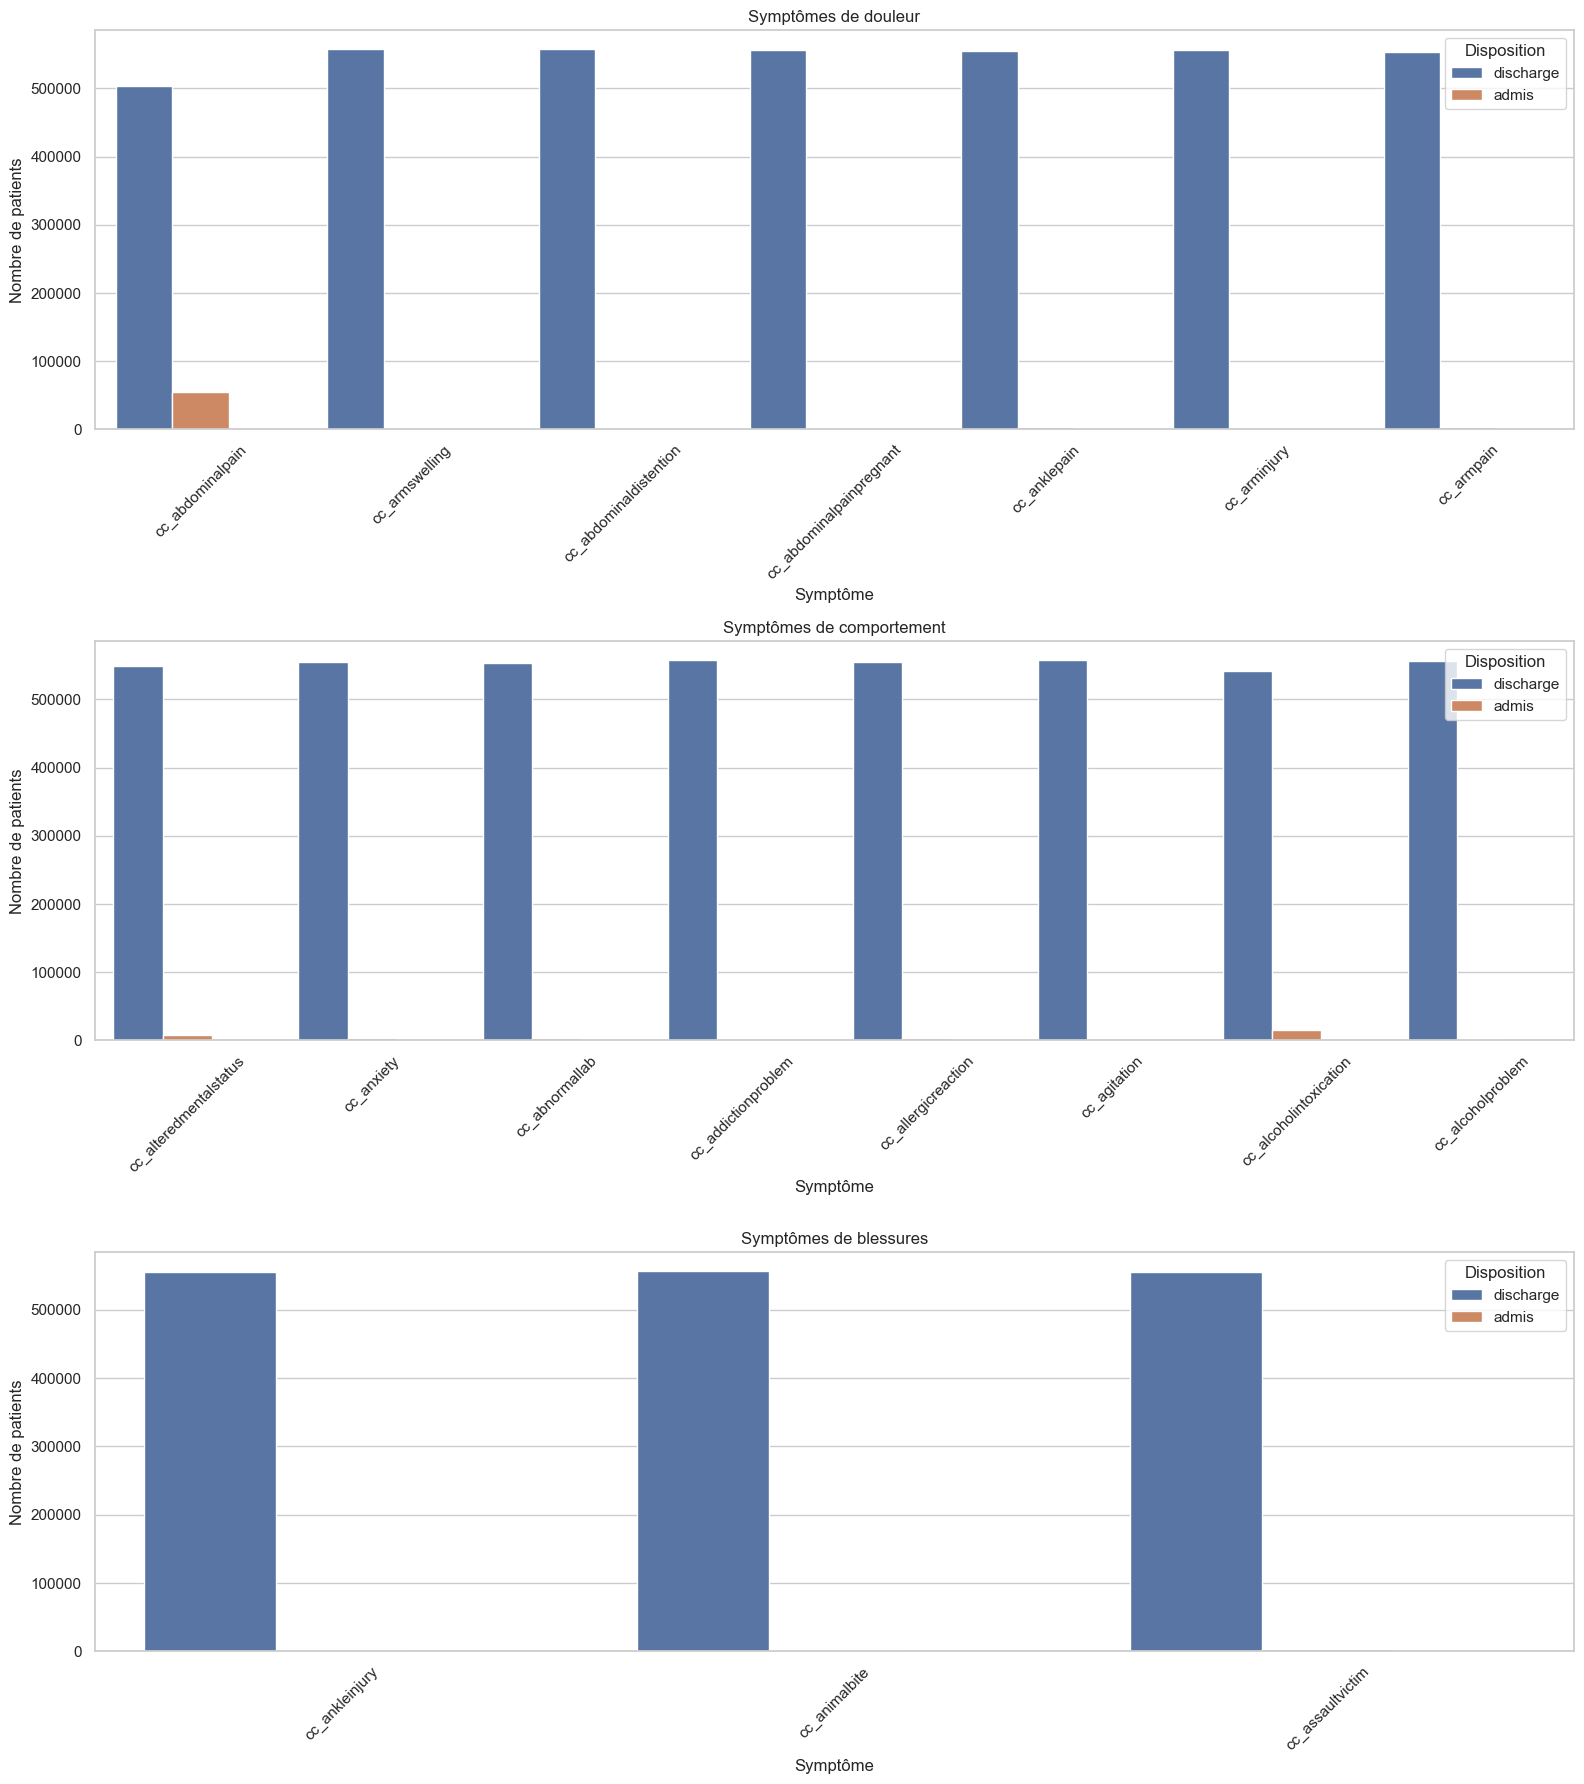

In [96]:

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 18))

for i, (symptoms, title) in enumerate(zip([symptoms_douleur, symptoms_comportement, symptoms_blessures],
                                          ['Symptômes de douleur', 'Symptômes de comportement', 'Symptômes de blessures'])):
    chief_comp_group = chief_comp[['disposition'] + symptoms]
    melted_data_group = pd.melt(chief_comp_group, id_vars=['disposition'], var_name='Symptome', value_name='Présence')
    
    melted_data_group['Présence'] = melted_data_group['Présence'].replace({0: 'discharge', 1: 'admis'})
    
    sns.countplot(x='Symptome', hue='Présence', data=melted_data_group, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('Symptôme')
    axes[i].set_ylabel('Nombre de patients')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(title='Disposition', labels=['discharge', 'admis'])

plt.tight_layout()
plt.show()

# Modèles